### Context
+ According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
+ This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

#### Attribute Information
+ 1) id: unique identifier
+ 2) gender: "Male", "Female" or "Other"
+ 3) age: age of the patient
+ 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
+ 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
+ 6) ever_married: "No" or "Yes"
+ 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
+ 8) Residence_type: "Rural" or "Urban"
+ 9) avg_glucose_level: average glucose level in blood
+ 10) bmi: body mass index
+ 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
+ 12) stroke: 1 if the patient had a stroke or 0 if not

In [38]:
import pandas as pd 
import numpy as np 
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


In [39]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


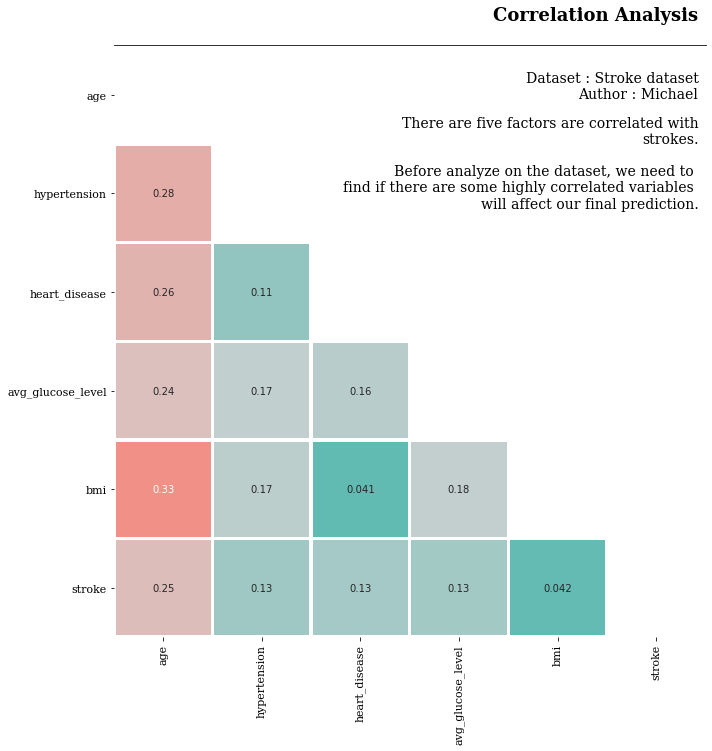

In [44]:
# Check correlation
import matplotlib
corr_df = df.drop(['id','gender','Residence_type','work_type'], axis=1)

#background_color = "#fbfbfb"
#fig.patch.set_facecolor(background_color) # figure background color

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#ax.set_facecolor(background_color) 
corr = corr_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

colors = ["#45b5aa","lightgray", "#ff6f61"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(corr, 
            square=True, 
            mask=mask,
            linewidth=2.5, 
            vmax=0.4, vmin=0, 
            cmap=cmap, 
            cbar=False, 
            ax=ax,annot=True)

ax.set_yticklabels(ax.get_xticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.spines['top'].set_visible(True)

fig.text(0.97, 1.02, 'Correlation Analysis', fontweight='bold', fontfamily='serif', fontsize=18, ha='right')    
fig.text(0.97, 0.912, 'Dataset : Stroke dataset\nAuthor : Michael', fontweight='light', fontfamily='serif', fontsize=14, ha='right')    

fig.text(0.97, 0.91, '''
There are five factors are correlated with
strokes.

Before analyze on the dataset, we need to 
find if there are some highly correlated variables 
will affect our final prediction.''', 
         fontweight='light', fontfamily='serif', fontsize=14, va='top', ha='right') 

plt.tight_layout()
plt.show()

In [3]:
df.drop('id', axis = 1, inplace = True)

In [4]:
df.replace({'Male':1, 'Female': 0},inplace = True)

In [5]:
df['ever_married'] = df['ever_married'].apply(lambda x: 1 if x.startswith('Yes') else 0)

In [6]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [7]:
df = pd.get_dummies(df, columns = ['smoking_status'])

In [8]:
df.drop('smoking_status_Unknown',axis = 1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,Private,Urban,228.69,36.6,1,1,0,0
1,0,61.0,0,0,1,Self-employed,Rural,202.21,NaN,1,0,1,0
2,1,80.0,0,1,1,Private,Rural,105.92,32.5,1,0,1,0
3,0,49.0,0,0,1,Private,Urban,171.23,34.4,1,0,0,1
4,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,Private,Urban,83.75,NaN,0,0,1,0
5106,0,81.0,0,0,1,Self-employed,Urban,125.20,40.0,0,0,1,0
5107,0,35.0,0,0,1,Self-employed,Rural,82.99,30.6,0,0,1,0
5108,1,51.0,0,0,1,Private,Rural,166.29,25.6,0,1,0,0


In [9]:
df['Residence_type']= df['Residence_type'].apply(lambda x : 1 if x.startswith('Urban') else 0)

In [10]:
df = pd.get_dummies(df, columns=['work_type'])

In [11]:
df.drop('work_type_Govt_job',axis = 1)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,NaN,1,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,1,0,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,0,0,1,0,1,0,0
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,NaN,0,0,0,1,0,0,1,0,0
5106,0,81.0,0,0,1,1,125.20,40.0,0,0,0,1,0,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.6,0,0,0,1,0,0,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.6,0,0,1,0,0,0,1,0,0


In [12]:
df = df[df['bmi'].notna()]

In [13]:
df.isna().sum()

gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
stroke                            0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
dtype: int64

<AxesSubplot:>

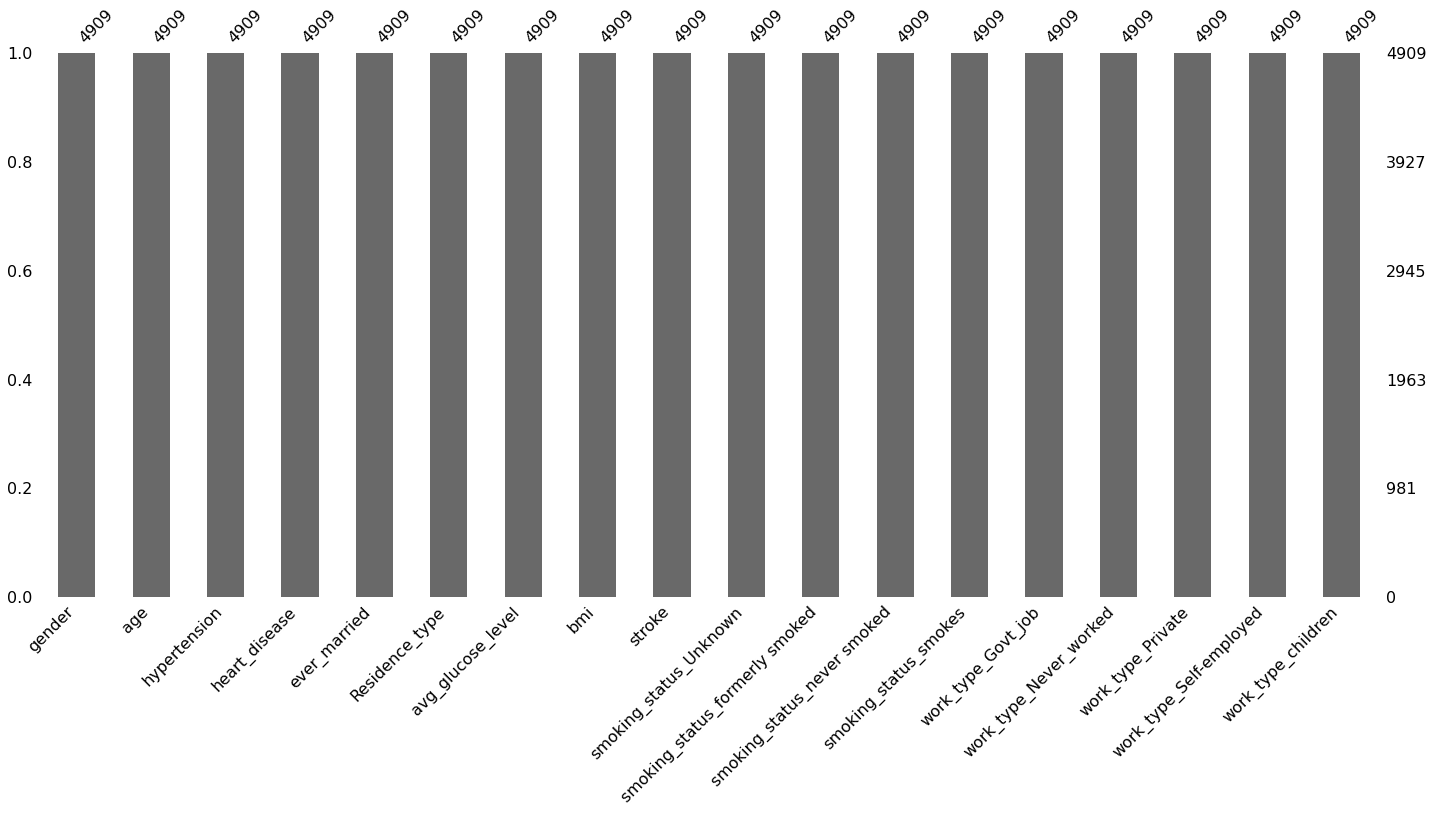

In [14]:
# Missing Value 
msno.bar(df)

+ There are no missing values in the dataset

In [15]:
# Check duplicated value 
df.duplicated().sum()

0

+ There are no duplicated values in the dataset

In [16]:
df = df[(df['gender'] != 'Other')]

In [17]:
X = df.drop('stroke',axis = 1)
y = df['stroke']

In [18]:
oversample = SMOTE()
X, y = oversample.fit_resample(X,y)

<AxesSubplot:xlabel='stroke', ylabel='count'>

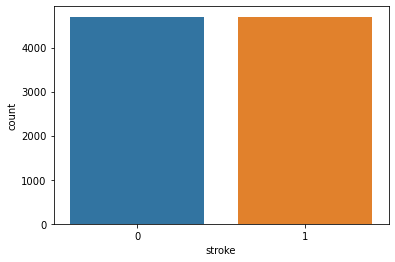

In [19]:
sns.countplot(x =y )

In [20]:
df.shape

(4908, 18)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest
from sklearn.model_selection import train_test_split

In [22]:
feature_selection=SelectKBest(f_classif,k=10).fit(X,y)

In [23]:
selected_features = X.columns[feature_selection.get_support()]

In [24]:
scaler = StandardScaler()
X_scale=scaler.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y,test_size=0.3,stratify=y,random_state = 0 )

# Logistic Regression 

In [28]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

model = LogisticRegression(max_iter=1000, random_state=1)
param_grid = {
    'penalty':['none','l2'],
}

grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5)
grid.fit(X_train, y_train)
print(f'Best parameters are: {grid.best_params_}')
print(f'The training accuracy is:{round(grid.best_score_,4)}')

#Evaluation 
y_predict = grid.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_predict).round(4)
print(f"The accuracy is: {accuracy_score(y_test, y_predict).round(4)}")
print('The confusion matrix is:')
cm = confusion_matrix(y_test, y_predict)
print(cm)

Best parameters are: {'penalty': 'l2'}
The training accuracy is:0.9194
The accuracy is: 0.9227
The confusion matrix is:
[[1354   56]
 [ 162 1248]]


# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state =1)

param_grid = {
    'criterion' : ["gini", "entropy"],
    'max_depth': [4,5],
}

grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5)
grid.fit(X_train, y_train)
print(f'Best parameters are:{grid.best_params_}')
print(f'The training accuracy is:{round(grid.best_score_,4)}')

#Evaluation
y_predict = grid.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_predict).round(4)
print(f'The accuracy score is: {accuracy_score(y_test, y_predict).round(4)}')
print('The confusion matrix is')
cm = confusion_matrix(y_test, y_predict)
print(cm)

Best parameters are:{'criterion': 'entropy', 'max_depth': 5}
The training accuracy is:0.8647
The accuracy score is: 0.8582
The confusion matrix is
[[1171  239]
 [ 161 1249]]


# Random Forest 

In [30]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 1)
param_grid = {
    'n_estimators':[100,200,300],
    'max_depth':[2,3,4,5],
}

grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5)
grid.fit(X_train, y_train)
print(f'Best parameters are: {grid.best_params_}')
print(f'The training accuracy is: {round(grid.best_score_,4)}')

#Evaluation
y_predict = grid.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_predict).round(4)
print(f'The accuracy is: {accuracy_score(y_test, y_predict).round(4)}')
print('The confusion matrix is:')
cm = confusion_matrix(y_test, y_predict)
print(cm)

Best parameters are: {'max_depth': 5, 'n_estimators': 300}
The training accuracy is: 0.8858
The accuracy is: 0.8791
The confusion matrix is:
[[1157  253]
 [  88 1322]]


# Support Vector Machine

In [31]:
from sklearn import svm

model = svm.SVC(random_state = 1)

param_grid = {
    'gamma':['auto','scale'],
    'kernel':['linear','rbf','poly'],
}

grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5)
grid.fit(X_train, y_train)
print(f'Best parameters are:{grid.best_params_}')
print(f'The training accuracy is:{round(grid.best_score_,4)}')

#Evaluation
y_predict = grid.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_predict).round(4)
print(f'The accuracy is: {accuracy_score(y_test, y_predict).round(4)}')
print('The confusion matrix:')
cm = confusion_matrix(y_test, y_predict)
print(cm)

Best parameters are:{'gamma': 'scale', 'kernel': 'rbf'}
The training accuracy is:0.9407
The accuracy is: 0.9358
The confusion matrix:
[[1371   39]
 [ 142 1268]]


# Light GBM

In [32]:
import lightgbm as lgbm
model = lgbm.LGBMClassifier(random_state=1)

param_grid = {
    'n_estimators':[500,600],
    'max_depth':[5,6],
    'num_leaves':[15,20,25],
}

grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5)
grid.fit(X_train, y_train)
print(f'Best parameters are:{grid.best_params_}')
print(f'The training accuracy is:{round(grid.best_score_,4)}')

#Evaluation 
y_predict = grid.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_predict).round(4)
print(f'The accuracy is: {accuracy_score(y_test, y_predict).round(4)}')
print('The confusion matrix is:')
cm =  confusion_matrix(y_test, y_predict)
print(cm)

Best parameters are:{'max_depth': 5, 'n_estimators': 600, 'num_leaves': 15}
The training accuracy is:0.9682
The accuracy is: 0.9734
The confusion matrix is:
[[1384   26]
 [  49 1361]]


# XGBoost

In [36]:
import xgboost as xgb
xgb_sklearn = xgb.XGBClassifier(random_state=1)
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [2,3,4],
}    
grid = GridSearchCV(estimator = xgb_sklearn, param_grid = param_grid, cv=3)
grid.fit(X_train, y_train)
print(f"Best parameters are: {grid.best_params_}")
print(f"The training accuracy is: {round(grid.best_score_,4)}")

# evaluation
y_predict = grid.best_estimator_.predict(X_test)
print(f"The accuracy is: {accuracy_score(y_test, y_predict).round(4)}")
print("The confusion matrix is:")
cm = confusion_matrix(y_test, y_predict)
print(cm)

C:\Users\vhao\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\vhao\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:32:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vhao\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\vhao\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:32:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vhao\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vhao\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vhao\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vhao\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vhao\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vhao\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vhao\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vhao\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vhao\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vhao\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vhao\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vhao\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vhao\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vhao\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vhao\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters are: {'max_depth': 4, 'n_estimators': 100}
The training accuracy is: 0.9611
The accuracy is: 0.9706
The confusion matrix is:
[[1386   24]
 [  59 1351]]
